# ElasticNet Regression

#### Principal idea behind the ElasticNet Regression is gathering L1 and L2 regularization in a formula.

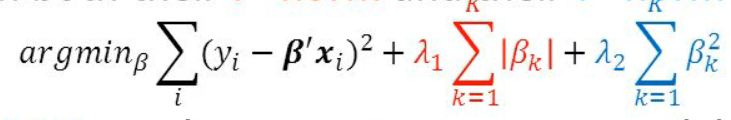

## Model

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
hit = pd.read_csv("../../Datasets/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'Division', 'League', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [3]:
from sklearn.linear_model import ElasticNet

In [4]:
enet_model = ElasticNet().fit(X_train, y_train)

## Prediction

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
y_pred = enet_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181248

In [9]:
r2_score(y_test, y_pred)

0.410702224693268

## Model Tuning

In [10]:
from sklearn.linear_model import ElasticNetCV

In [12]:
enet_model_cv = ElasticNetCV(cv=10, random_state=42).fit(X_train, y_train)

In [15]:
enet_tuned = ElasticNet(alpha=enet_model_cv.alpha_).fit(X_train, y_train)

In [17]:
enet_tuned

ElasticNet(alpha=5230.7647364798695)

In [18]:
y_pred = enet_tuned.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795

In [20]:
r2_score(y_test, y_pred)

0.2823382467773815